In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Keshav\Downloads\Kaggle_Datasets.csv")
df

,title,usability,num_of_files,types_of_files,files_size,vote_counts,medal,url_reference,keywords,num_of_columns,views,downloads,download_per_view,date_created,last_updated
0,COVID-19 World Vaccination Progress,10.0,1.0,CSV,35 KB,173,Silver,/gpreda/covid-world-vaccination-progress,"health,covid19,public safety,public health",15.0,23364.0,3768.0,0.16,1/12/2021,1/29/2021
1,Android smartphones high accuracy GNSS datasets,8.8,190.0,other,1 GB,83,Bronze,/google/android-smartphones-high-accuracy-data...,"geospatial analysis,mobile and wireless,resear...",NaN,10441.0,715.0,0.07,12/23/2020,12/23/2020
2,All Trump's Twitter insults (2015-2021),10.0,1.0,CSV,581 KB,51,Bronze,/ayushggarg/all-trumps-twitter-insults-20152021,"internet,online communities,social science,pol...",5.0,6703.0,727.0,0.11,1/20/2021,1/20/2021
3,US Drought & Meteorological Data,9.4,3.0,JSON,748 MB,15,Bronze,/cdminix/us-drought-meteorological-data,"earth and nature,tabular data,time series anal...",NaN,1666.0,123.0,0.07,1/20/2021,1/21/2021
4,Temperature change,10.0,2.0,CSV,778 KB,32,Bronze,/sevgisarac/temperature-change,"earth and nature,health,environment,weather an...",66.0,4893.0,798.0,0.16,12/24/2020,12/24/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,Parkinson's Drawings,8.8,204.0,other,41 MB,27,Bronze,/kmader/parkinsons-drawings,"earth and nature,image data,classification,hea...",NaN,8531.0,766.0,0.09,4/29/2019,4/29/2019
5713,Toxic Comment Detection Multilingual [Extended],5.3,10.0,"CSV, other, JSON",50 MB,7,No_Medal,/alansun17904/toxic-comment-detection-multilin...,"nlp,classification,deep learning,binary classi...",NaN,1117.0,115.0,0.10,6/6/2020,6/6/2020
5714,Serie A data,4.4,1.0,other,28 KB,15,Bronze,/domizianostingi/serie-a-data,football,NaN,333.0,16.0,0.05,10/31/2020,10/31/2020
5715,Student performance,8.2,2.0,CSV,4 KB,16,No_Medal,/hdawkins/student-performance,"education,music,standardized testing,universit...",12.0,11711.0,1077.0,0.09,1/25/2017,1/25/2017


In [3]:
df.isnull().sum()

title                   0
usability               0
num_of_files          333
types_of_files        267
files_size             66
vote_counts             0
medal                   0
url_reference           0
keywords              618
num_of_columns       2668
views                   1
downloads               1
download_per_view       1
date_created           95
last_updated           95
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)


In [8]:
# Drop rows with a significant number of missing values
df = df.dropna(thresh=len(df.columns) - 3)

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert date columns to datetime
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

# Drop unnecessary columns (if any)
# Example: df = df.drop(columns=['url_reference'])

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

df.head()

C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\2209047709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\2209047709.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\2209047709.py:13: SettingWithCopyWarning: 
A value is trying to be set on a c

,title,usability,num_of_files,types_of_files,files_size,vote_counts,medal,url_reference,keywords,num_of_columns,views,downloads,download_per_view,date_created,last_updated
0,COVID-19 World Vaccination Progress,10.0,1.0,CSV,35 KB,173,Silver,/gpreda/covid-world-vaccination-progress,"health,covid19,public safety,public health",15.0,23364.0,3768.0,0.16,2021-01-12,2021-01-29
1,Android smartphones high accuracy GNSS datasets,8.8,190.0,other,1 GB,83,Bronze,/google/android-smartphones-high-accuracy-data...,"geospatial analysis,mobile and wireless,resear...",11.0,10441.0,715.0,0.07,2020-12-23,2020-12-23
2,All Trump's Twitter insults (2015-2021),10.0,1.0,CSV,581 KB,51,Bronze,/ayushggarg/all-trumps-twitter-insults-20152021,"internet,online communities,social science,pol...",5.0,6703.0,727.0,0.11,2021-01-20,2021-01-20
3,US Drought & Meteorological Data,9.4,3.0,JSON,748 MB,15,Bronze,/cdminix/us-drought-meteorological-data,"earth and nature,tabular data,time series anal...",11.0,1666.0,123.0,0.07,2021-01-20,2021-01-21
4,Temperature change,10.0,2.0,CSV,778 KB,32,Bronze,/sevgisarac/temperature-change,"earth and nature,health,environment,weather an...",66.0,4893.0,798.0,0.16,2020-12-24,2020-12-24


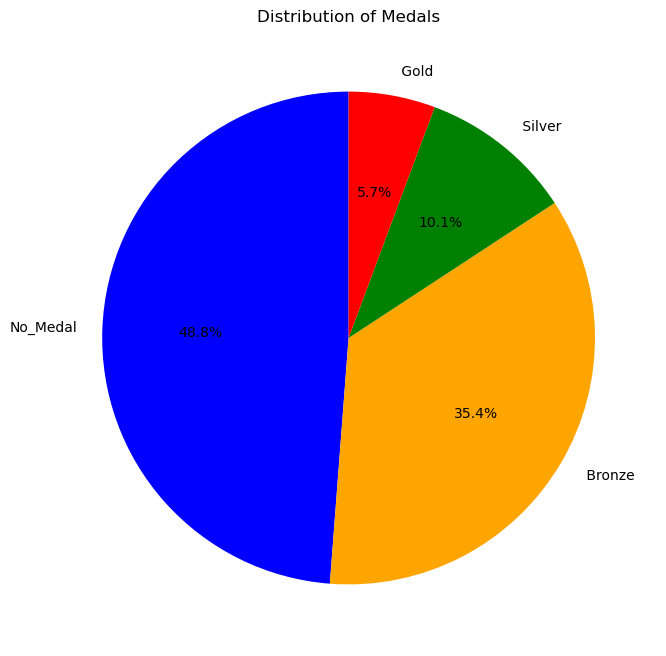

In [14]:
# Create a pie chart for the 'medal' column
medal_counts = df['medal'].value_counts()

plt.figure(figsize=(8, 8))
medal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green','red'])
plt.title('Distribution of Medals')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.show()

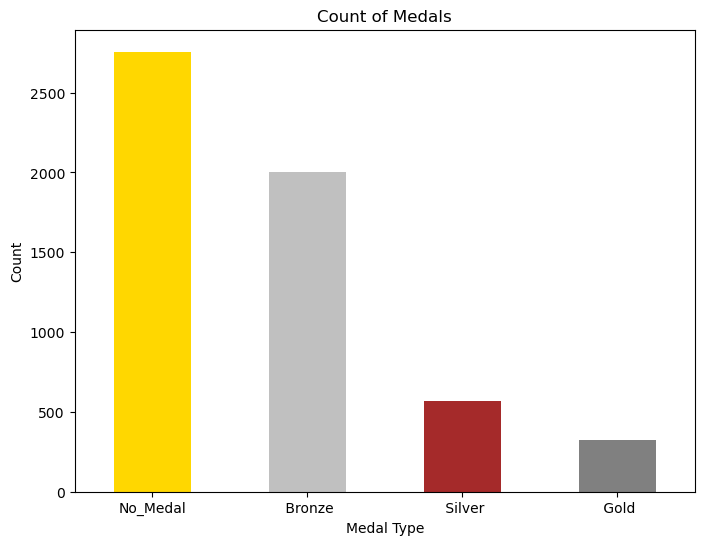

In [15]:
# Create a bar graph for the 'medal' column
medal_counts = df['medal'].value_counts()

plt.figure(figsize=(8, 6))
medal_counts.plot(kind='bar', color=['gold', 'silver', 'brown', 'gray'])
plt.title('Count of Medals')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

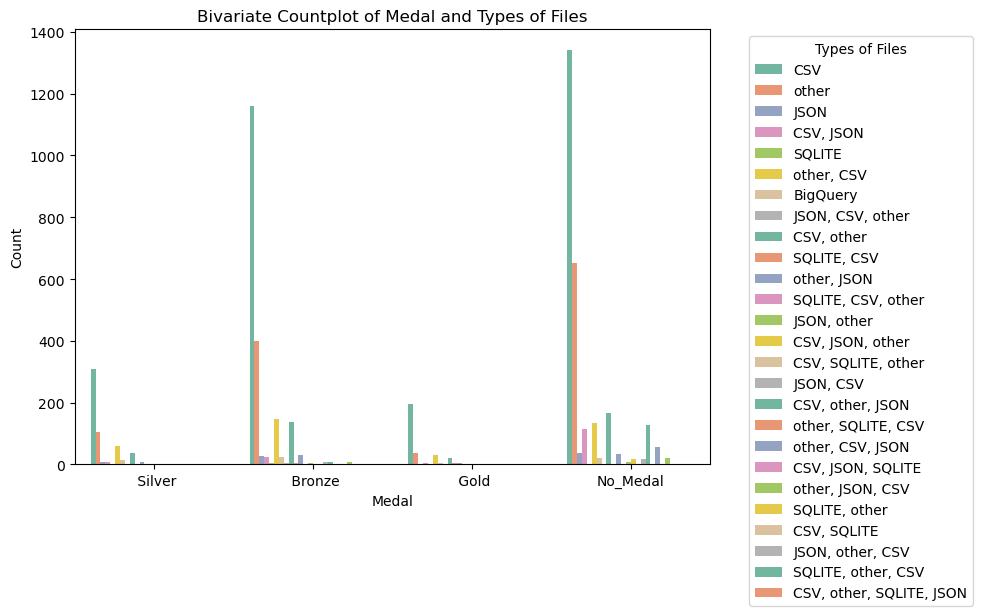

In [16]:
# Create a bivariate countplot for 'medal' and 'types_of_files'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='medal', hue='types_of_files', palette='Set2')
plt.title('Bivariate Countplot of Medal and Types of Files')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.legend(title='Types of Files', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

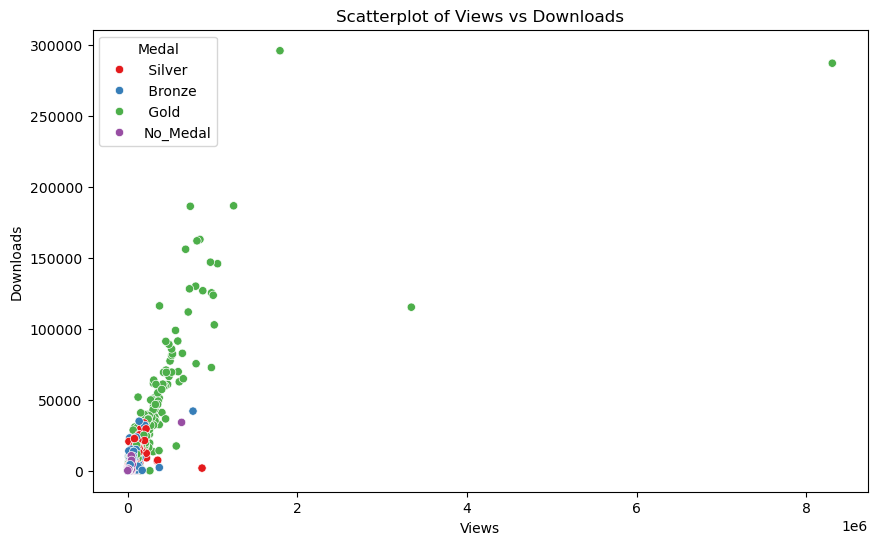

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='downloads', hue='medal', palette='Set1')
plt.title('Scatterplot of Views vs Downloads')
plt.xlabel('Views')
plt.ylabel('Downloads')
plt.legend(title='Medal')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\3569396300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\3569396300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\Keshav\AppData\Local\Temp\ipykernel_8132\3569396300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,title,usability,num_of_files,types_of_files,files_size,vote_counts,medal,url_reference,keywords,num_of_columns,views,downloads,download_per_view,date_created,last_updated
0,841,10.0,1.0,1,692,173,2,1910,2482,15.0,23364.0,3768.0,0.16,1432,1377
1,393,8.8,190.0,20,0,83,0,1894,2380,11.0,10441.0,715.0,0.07,1412,1340
2,339,10.0,1.0,1,1106,51,0,585,2760,5.0,6703.0,727.0,0.11,1440,1368
3,4781,9.4,3.0,10,1348,15,0,914,2066,11.0,1666.0,123.0,0.07,1440,1369
4,4475,10.0,2.0,1,1391,32,0,4526,1889,66.0,4893.0,798.0,0.16,1413,1341


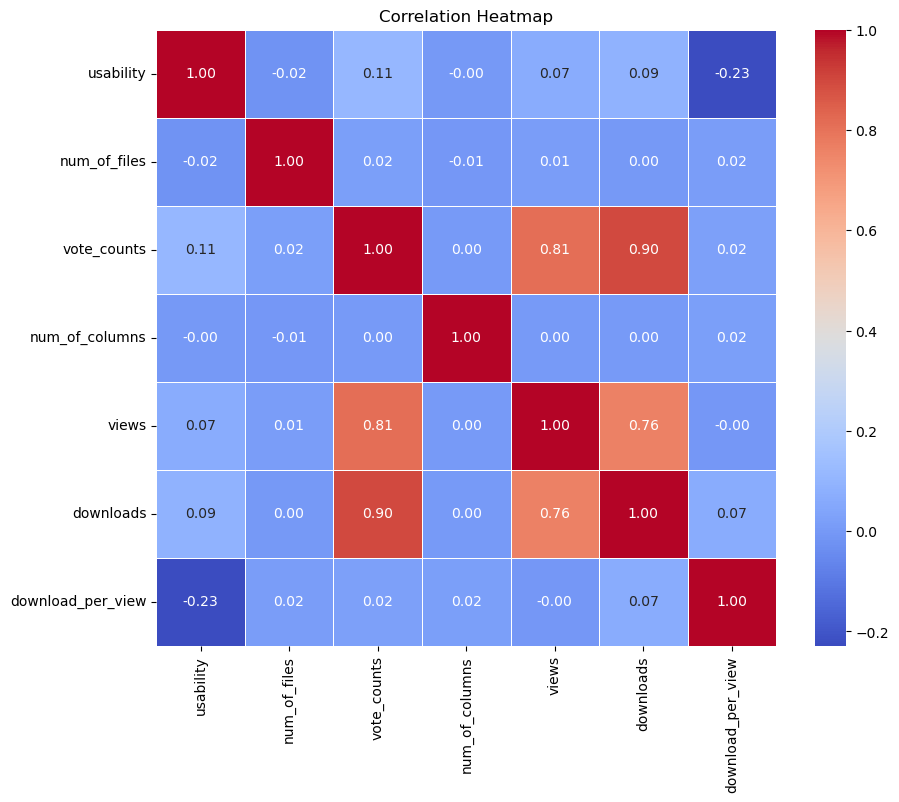

In [19]:
# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()